<a href="https://colab.research.google.com/github/SaranyaBayaneni/OIBSIP/blob/main/unemployment_analysis_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UNEMPLOYMENT ANALYSIS WITH PYTHON

In [1]:
# data processing
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
df.shape

(768, 7)

In [7]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [9]:
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object

In [11]:
# selecting the categorical variables
categorical_var = df.select_dtypes(include='object')
# Obtaining summary statistics for the categorical variables
categorical_stat = categorical_var.describe().T
categorical_stat

,count,unique,top,freq
Region,740,28,Andhra Pradesh,28
Frequency,740,2,Monthly,381
Area,740,2,Urban,381


In [12]:
# selecting numerical variables
numerical_var = df.select_dtypes(exclude='object')
# Obtaining summar statistics for the numerical variables
numerical_stat = numerical_var.describe().T
numerical_stat

,count,mean,min,25%,50%,75%,max,std
Date,740,2019-12-12 18:36:58.378378496,2019-05-31 00:00:00,2019-08-31 00:00:00,2019-11-30 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,NaN
Estimated Unemployment Rate (%),740.0,11.787946,0.0,4.6575,8.35,15.8875,76.74,10.721298
Estimated Employed,740.0,7204460.025676,49420.0,1190404.5,4744178.5,11275489.5,45777509.0,8087988.429458
Estimated Labour Participation Rate (%),740.0,42.630122,13.33,38.0625,41.16,45.505,72.57,8.111094


In [13]:
df = df.drop('Frequency', axis=1)
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural


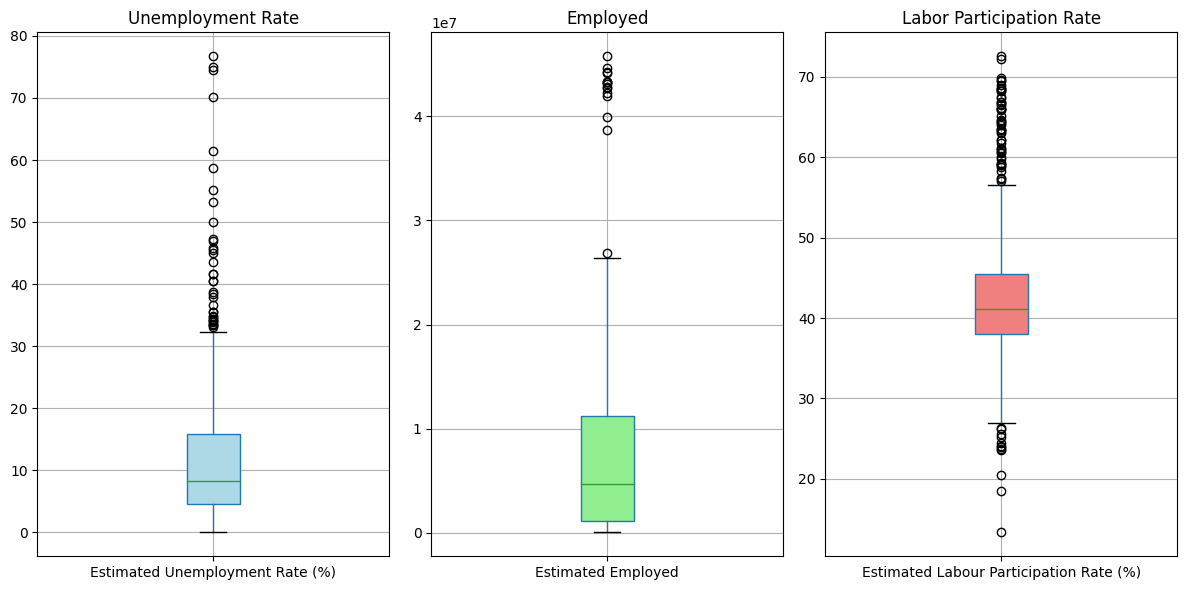

In [14]:
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Create a figure with three subplots
plt.figure(figsize=(12, 6))

# Subplot 1: Unemployment Rate
plt.subplot(131)
df.boxplot(column='Estimated Unemployment Rate (%)', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[0])  # Set the color of the first box
plt.title('Unemployment Rate')

# Subplot 2: Employed
plt.subplot(132)
df.boxplot(column='Estimated Employed', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[1])  # Set the color of the second box
plt.title('Employed')

# Subplot 3: Labor Participation Rate
plt.subplot(133)
df.boxplot(column='Estimated Labour Participation Rate (%)', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[2])  # Set the color of the third box
plt.title('Labor Participation Rate')

plt.tight_layout()
plt.show()

In [15]:
sns.set_context('notebook', font_scale=1.3)
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', linewidths=0.5)

ValueError: could not convert string to float: 'Andhra Pradesh'

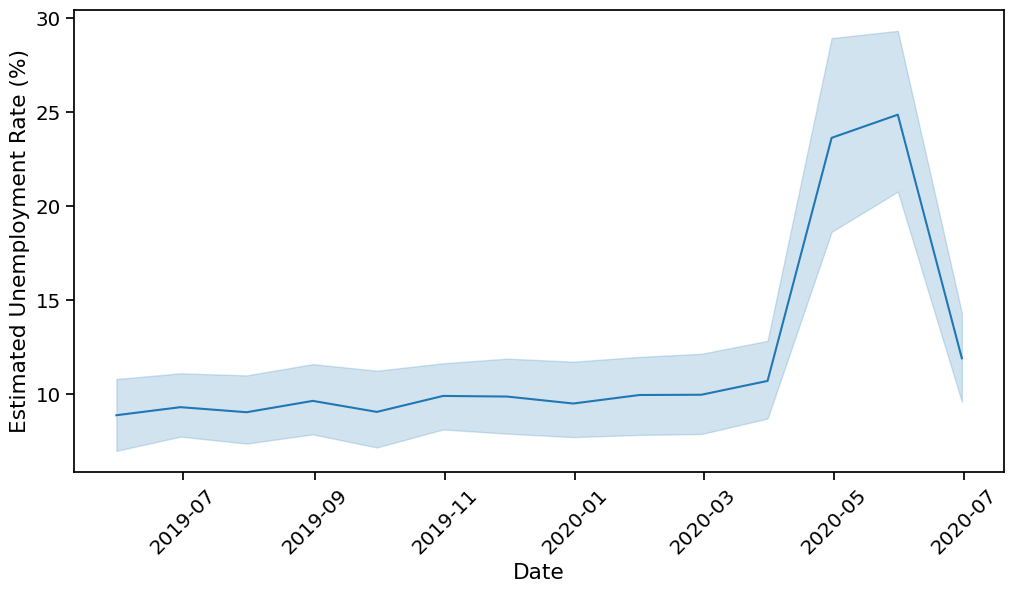

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

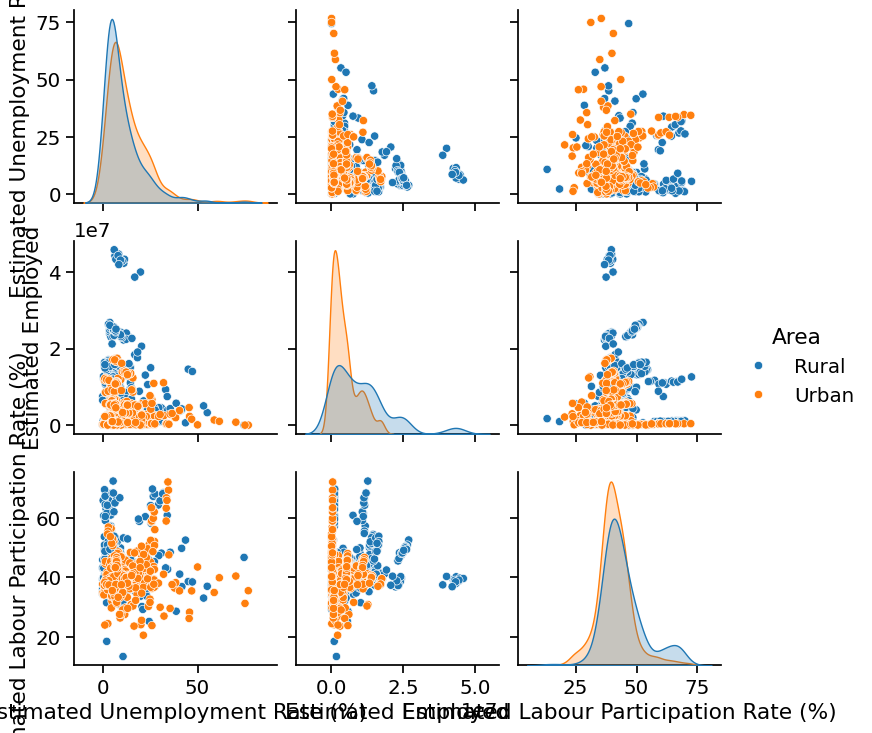

In [17]:
sns.pairplot(df, hue='Area')

In [18]:
import plotly.express as px
plot_unemp = df[['Estimated Unemployment Rate (%)','Region']]
df_unemployed = plot_unemp.groupby('Region').mean().reset_index()

df_unemployed = df_unemployed.sort_values('Estimated Unemployment Rate (%)')

fig = px.bar(df_unemployed, x='Region',y='Estimated Unemployment Rate (%)',color = 'Region',title = 'Average unemployment rate in each state',
             template='seaborn')
fig.show()

In [19]:
fig = px.violin(
    df,
    x='Area',
    y='Estimated Unemployment Rate (%)',
    title='Distribution of Unemployment Rates by Areas',
    box=True,  # Include box plot inside the violin
    points='all',  # Show individual data points
)

fig.show()

In [20]:
fig = px.area(
    df,
    x='Date',
    y='Estimated Labour Participation Rate (%)',
    color='Region',
    labels={'Estimated Labour Participation Rate (%)': 'Labour Participation Rate (%)'},
    category_orders={'Region': df['Region'].unique()}  # Preserve the order of regions
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Labour Participation Rate (%)',
    legend_title='Region',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
)

fig.show()

In [21]:
df['Month'] = df['Date'].dt.month
df

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,5.0
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,6.0
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,7.0
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,8.0
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,9.0
...,...,...,...,...,...,...,...
763,NaN,NaT,NaN,NaN,NaN,NaN,NaN
764,NaN,NaT,NaN,NaN,NaN,NaN,NaN
765,NaN,NaT,NaN,NaN,NaN,NaN,NaN
766,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [22]:
# Filter data for months 1 to 3 (before lockdown)
before_lock = df[(df['Month'] >= 1) & (df['Month'] <= 3)][['Region', 'Estimated Unemployment Rate (%)']]

In [23]:
# Filter data for months 3 to 5 (after lockdown)
after_lock = df[(df['Month'] >= 3) & (df['Month'] < 6)][['Region', 'Estimated Unemployment Rate (%)']]

In [24]:
before_lock = before_lock.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(
    columns={'Estimated Unemployment Rate (%)':'Unemployment Rate before Lock-Down'})

In [25]:
after_lock = after_lock.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(
    columns={'Estimated Unemployment Rate (%)':'Unemployment Rate after Lock-Down'})

In [27]:
before_lock['Percentage Change in Unemployment'] = round((after_lock['Unemployment Rate after Lock-Down'] - before_lock['Unemployment Rate before Lock-Down']) / before_lock['Unemployment Rate before Lock-Down'], 2)

<Axes: xlabel='Percentage Change in Unemployment', ylabel='Region'>

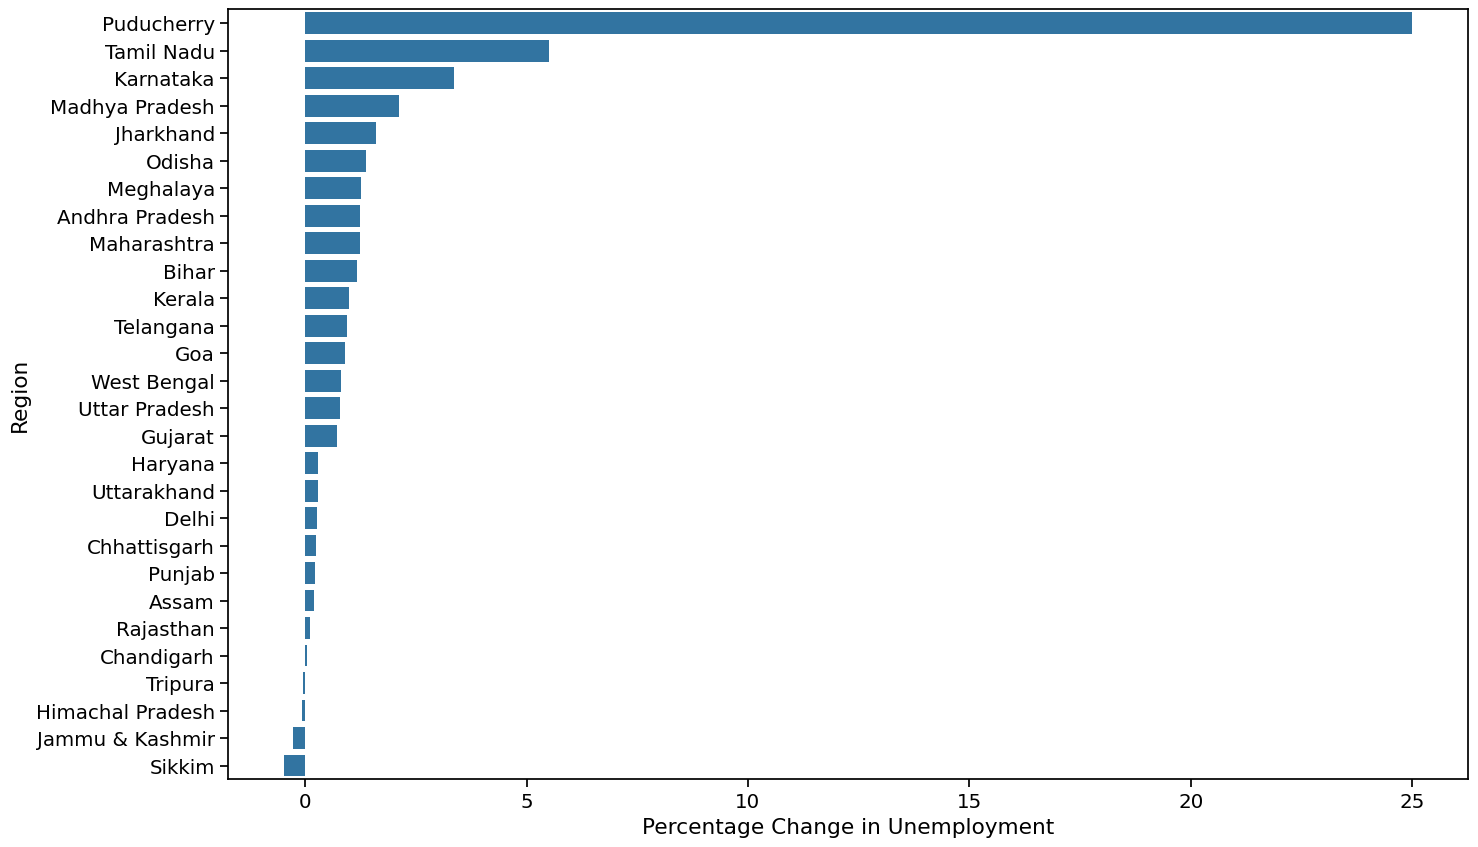

In [28]:
plot_df = before_lock.sort_values('Percentage Change in Unemployment', ascending=False)
plt.figure(figsize=(16, 10))
sns.barplot(data=plot_df, y='Region', x='Percentage Change in Unemployment')